<a href="https://colab.research.google.com/github/tusharsuthar4828/DataScience_ExcelR/blob/main/Random_Forests_CompanyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
company = pd.read_csv("/content/Company_Data.csv")


In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.shape

(400, 11)

In [5]:
company.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
Sales,9.5,11.22,10.06,7.4,4.15,10.81,6.63,11.85,6.54,4.69,9.01,11.96,3.98,10.96,11.17,8.71,7.58,12.29,13.91,8.73,6.41,12.13,5.08,5.87,10.14,14.9,8.33,5.27,2.99,7.81,13.55,8.25,6.2,8.77,2.67,11.07,8.89,4.95,6.59,3.24,...,8.77,8.68,5.25,10.26,10.5,6.53,5.98,14.37,10.71,10.26,7.68,9.08,7.8,5.58,9.44,7.9,16.27,6.81,6.11,5.81,9.64,3.9,4.95,9.35,12.85,5.87,5.32,8.67,8.14,8.44,5.47,6.1,4.53,5.57,5.35,12.57,6.14,7.41,5.94,9.71
CompPrice,138,111,113,117,141,124,115,136,132,132,121,117,122,115,107,149,118,147,110,129,125,134,128,121,145,139,107,98,103,104,125,136,107,114,115,131,122,121,109,130,...,118,131,131,111,122,154,124,95,109,135,126,152,121,137,131,132,141,132,133,125,106,124,121,98,123,131,152,142,135,128,108,153,129,109,130,138,139,162,100,134
Income,73,48,35,100,64,113,105,81,110,113,78,94,35,28,117,95,32,74,110,76,90,29,46,31,119,32,115,118,74,99,94,58,32,38,54,84,76,41,73,60,...,86,25,55,75,21,30,56,106,22,100,41,81,50,71,47,46,60,61,88,111,64,65,28,117,37,73,116,73,89,42,75,63,42,51,58,108,23,26,79,37
Advertising,11,16,10,4,3,13,0,15,0,0,9,4,2,11,11,5,0,13,0,16,2,12,6,0,16,0,11,0,0,15,0,16,12,13,0,11,0,5,0,0,...,7,10,0,1,16,0,11,0,10,22,22,0,0,0,7,4,19,0,3,0,10,21,19,0,15,13,0,14,11,8,9,0,13,10,19,17,3,12,7,0
Population,276,260,269,466,340,501,45,425,108,131,150,503,393,29,148,400,284,251,408,58,367,239,497,292,294,176,496,19,359,226,447,241,236,317,406,29,270,412,454,144,...,265,183,26,377,488,122,447,256,348,463,403,191,508,402,90,206,319,263,105,404,17,496,315,76,348,455,170,238,245,328,61,49,315,26,366,203,37,368,284,27
Price,120,83,80,97,128,72,108,120,124,124,100,94,136,86,118,144,110,131,68,121,131,109,138,109,113,82,131,107,97,102,89,131,137,128,128,96,100,110,102,138,...,114,104,110,108,131,162,134,53,79,122,119,126,98,116,118,124,92,125,119,107,89,151,121,68,112,132,160,115,78,107,111,124,130,120,139,128,120,159,95,120
ShelveLoc,Bad,Good,Medium,Medium,Bad,Bad,Medium,Good,Medium,Medium,Bad,Good,Medium,Good,Good,Medium,Good,Good,Good,Medium,Medium,Good,Medium,Medium,Bad,Good,Good,Medium,Bad,Bad,Good,Medium,Good,Good,Medium,Medium,Good,Medium,Medium,Bad,...,Good,Medium,Bad,Good,Good,Medium,Medium,Good,Good,Medium,Bad,Medium,Medium,Medium,Medium,Medium,Good,Medium,Medium,Bad,Medium,Bad,Medium,Medium,Good,Medium,Medium,Medium,Bad,Medium,Medium,Bad,Bad,Medium,Bad,Good,Medium,Medium,Bad,Good
Age,42,65,59,55,38,78,71,67,76,76,26,50,62,53,52,76,63,52,46,69,35,62,42,79,42,54,50,64,55,58,30,44,64,50,42,44,60,54,65,38,...,52,56,79,25,30,57,53,52,74,36,42,54,65,78,47,73,44,41,79,54,68,77,66,63,28,62,39,73,79,35,67,56,34,30,33,33,55,40,50,49
Education,17,10,12,14,13,16,15,10,10,17,10,13,18,18,18,18,13,10,17,12,18,18,13,10,12,11,11,17,11,17,12,18,10,16,17,17,18,10,15,10,...,15,15,12,12,14,17,12,17,14,14,12,16,11,17,12,11,11,12,12,15,17,13,14,10,12,17,16,14,16,12,12,16,13,17,16,14,11,18,12,16
Urban,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,...,No,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes


In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


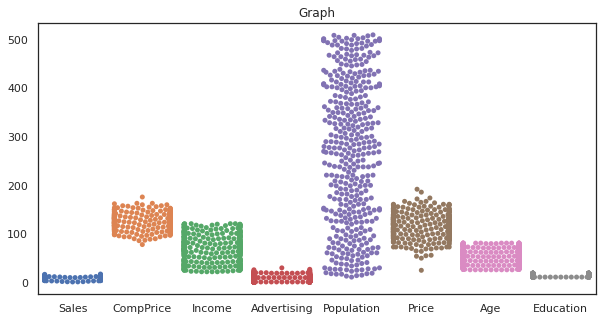

In [13]:
import seaborn as sns

sns.set(style="white")
plt.figure(figsize =(10, 5))
ax = sns.swarmplot(data=company)
plt.title('Graph')
 
plt.show()

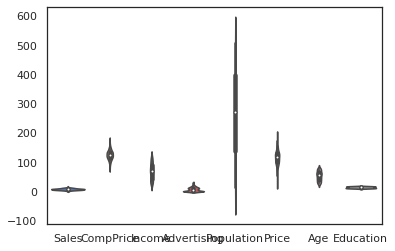

In [20]:
sns.violinplot(data=company)

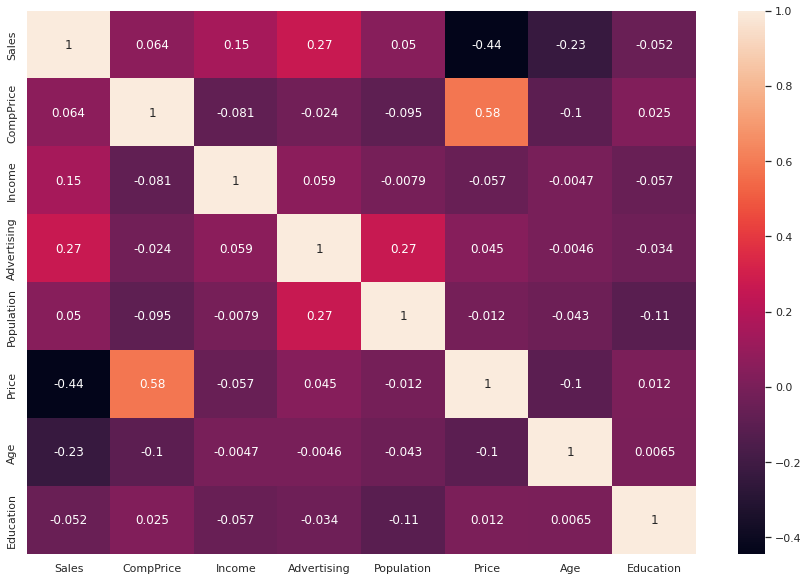

In [21]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(company.corr(),annot=True)

In [22]:
numerical_feature = company.describe(include=["int64", "float64"]).columns

print(list(numerical_feature))


['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


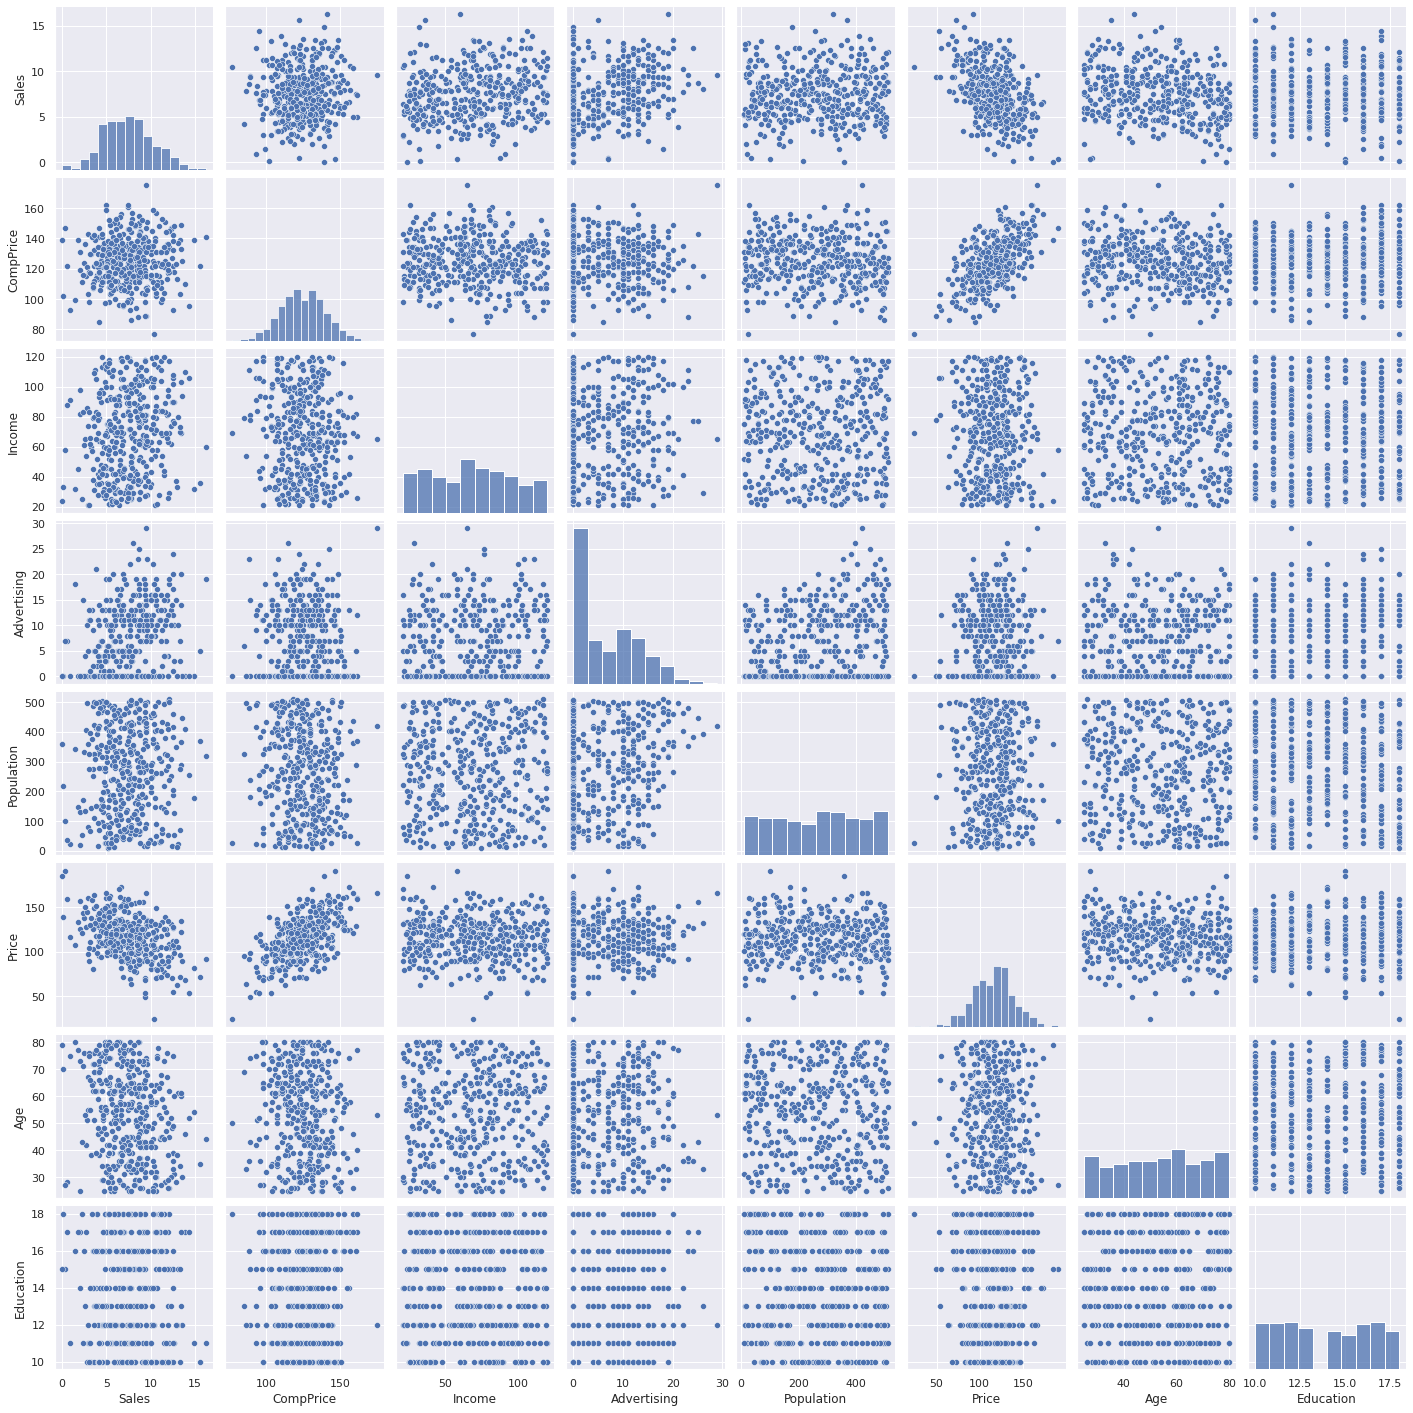

In [23]:
sns.set_style('darkgrid')
sns.pairplot(company[numerical_feature])
plt.show()

In [24]:
categorical_feature = company.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


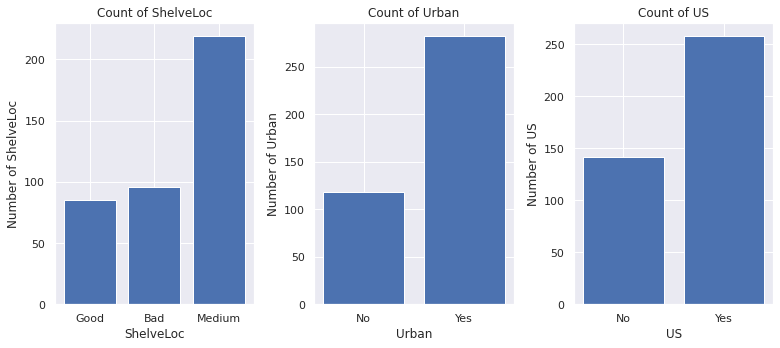

In [27]:
plt.figure(figsize=(11, 5))
for idx, column in enumerate(categorical_feature):
    df = company.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

In [33]:
def distplot(param):
    plt.figure(figsize=(12,6))
    sns.distplot(company[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

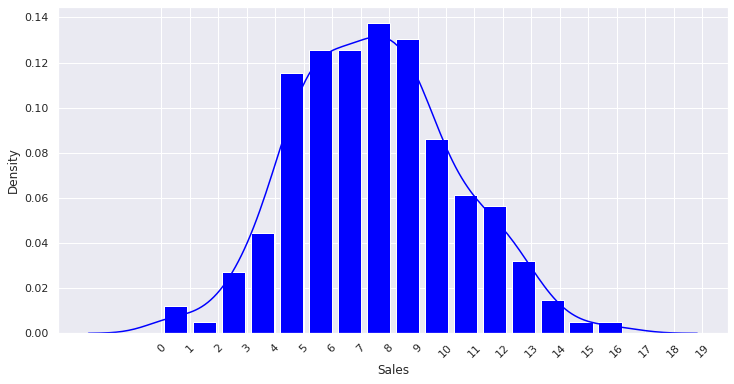

In [34]:
distplot("Sales")

Text(0.5, 1.0, 'Correlation with Sales')

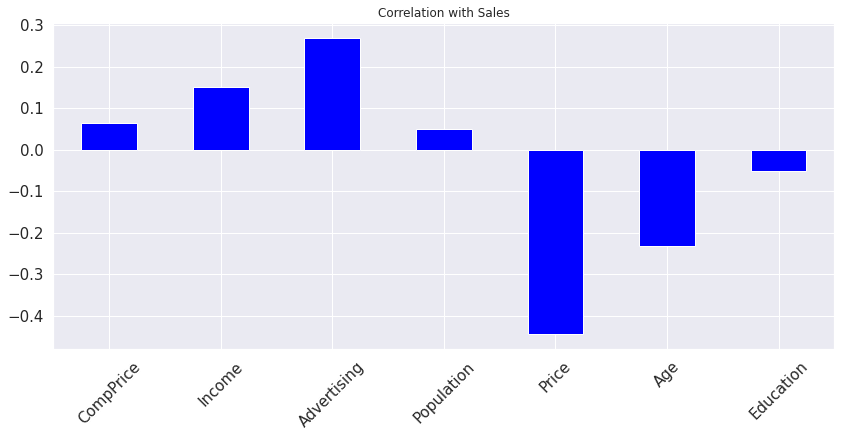

In [36]:
company_1 = company.iloc[:,1:]

correlations = company_1.corrwith(company.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (14, 6), 
        fontsize = 15, 
        color = 'blue',
        rot = 45, grid = True)
plt.title('Correlation with Sales')

In [37]:
#Changing the categorical variables into dummies.
company_1 = pd.get_dummies(company)

In [38]:
#Converting the Target variable i.e. Sales into Categorical
company_1['Category'] = pd.cut(company_1['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Average','High'],
                        include_lowest=True)
company_1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Average
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Average
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Average
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Average
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Average


In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=company['Sales'].value_counts(), name="Sales"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=14)

fig.update_layout(
    title_text="Sales Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sales', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [41]:
#Random Forest

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [43]:
array = company_1.values
X = array[:,1:15]
Y = array[:,15]

In [44]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean()*100)

87.25000000000001


In [45]:
#Ensemble techniques

In [46]:
#1. Bagging

In [47]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
seed = 10

cart = DecisionTreeClassifier()
num_trees = 100

In [49]:
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
print(results1.mean()*100)

86.75


In [50]:
#2. Boosting
#AdaBoost Classification

In [51]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(results2.mean()*100)
89.75

89.75


89.75

In [52]:
#3. Stacking
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [53]:
#Iteration = 1

estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))

model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))

model5 = SVC()
estimators.append(('svm', model5))

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))

model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

89.50000000000001


In [54]:
#Iteration = 2

estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))

model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))

model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))

model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

89.75000000000001


In [55]:
#Iteration = 3
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))

model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))

model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble modSel
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results5.mean()*100)

90.25000000000001


In [56]:
#Iteration = 4
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))

model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

87.25


In [57]:
#Iteration = 5
estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))

model18 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model18))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

91.5
